##Data Loading


Load the preprocessed data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

# Provide the correct file path
file_path_train = "/content/drive/My Drive/BA THESIS/data/train_NB_lem.csv"
file_path_val = "/content/drive/My Drive/BA THESIS/data/val_NB_lem.csv"
#file_path_test = "/content/drive/My Drive/BA THESIS/data/test_NB_lem.csv"


# Load CSV
train_NB_lem = pd.read_csv(file_path_train)
val_NB_lem = pd.read_csv(file_path_val)
#test_NB_lem = pd.read_csv(file_path_test)


In [2]:
# Provide the correct file path
file_path_train = "/content/drive/My Drive/BA THESIS/data/train_NB_stem.csv"
file_path_val = "/content/drive/My Drive/BA THESIS/data/val_NB_stem.csv"
#file_path_test = "/content/drive/My Drive/BA THESIS/data/test_NB_stem.csv"


# Load CSV
train_NB_stem = pd.read_csv(file_path_train)
val_NB_stem = pd.read_csv(file_path_val)
#test_NB_stem = pd.read_csv(file_path_test)


In [3]:
# Provide the correct file path
file_path_train = "/content/drive/My Drive/BA THESIS/data/train_BERT.csv"
file_path_val = "/content/drive/My Drive/BA THESIS/data/val_BERT.csv"
#file_path_test = "/content/drive/My Drive/BA THESIS/data/test_BERT.csv"


# Load CSV
train_BERT = pd.read_csv(file_path_train)
val_BERT = pd.read_csv(file_path_val)
#test_BERT = pd.read_csv(file_path_test)


# Naive Bayes model training


Both lemmatizing and stemming datasets will be used separately and the highest validation accuracy will chose, which method will be carreid on. The intuition behind this is that with stemming the occurences of words (stems) will be higher as it uses brute force to stem words and allows for less stems and more reduction comapred to lemmatizing.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [5]:
def best_parameter_search (vectorizer, X_train, y_train, X_val, y_val):

  pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', MultinomialNB())
  ])

  # Grid of hyperparameters
  param_grid = {
      'vectorizer__ngram_range': [(1, 1), (1, 2)],
      'vectorizer__max_features': [5000, 10000, 15000, 20000, 25000],
      'classifier__alpha': [0.1, 0.5, 1.0]
  }

  # Grid search only on training data
  grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Best model from grid search
  best_model = grid_search.best_estimator_

  # Evaluate on validation set
  y_pred = best_model.predict(X_val)

  # Print evaluation metrics
  print("Validation Accuracy:", accuracy_score(y_val, y_pred))
  print("\nClassification Report:\n", classification_report(y_val, y_pred))
  print("Best Parameters:", grid_search.best_params_)
  print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

## Lemmatizing vs Stemming (with different vectorizers)

In [6]:
x_lem = train_NB_lem['text']
y_lem = train_NB_lem['ground_truth']

In [7]:
x_lem_val = val_NB_lem['text']
y_lem_val = val_NB_lem['ground_truth']

In [8]:
x_stem = train_NB_stem['text']
y_stem = train_NB_stem['ground_truth']

In [9]:
x_stem_val = val_NB_stem['text']
y_stem_val = val_NB_stem['ground_truth']

### TF-IDF vectorizer

Parameters:
- ngram_range: (1,1) or (1,2)
- max_features: 5000, 10 000, 15 000, 20 0000, 25 000
- alpha: 0.1, 0.5 and 1

The best parameters are ngram_range (1,2), max features 20,000 for lemmatized and 25,000 for stemmed set and alpha 1. On the lemmatized set the model performs marginally better.

In [10]:
best_parameter_search (TfidfVectorizer(), x_lem, y_lem, x_lem_val, y_lem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.602053388090349

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.70      0.64       813
     neutral       0.60      0.46      0.52       808
    positive       0.62      0.64      0.63       814

    accuracy                           0.60      2435
   macro avg       0.60      0.60      0.60      2435
weighted avg       0.60      0.60      0.60      2435

Best Parameters: {'classifier__alpha': 1.0, 'vectorizer__max_features': 20000, 'vectorizer__ngram_range': (1, 2)}
Best Cross-Validation Score: 0.5967


In [11]:
best_parameter_search (TfidfVectorizer(), x_stem, y_stem, x_stem_val, y_stem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.5971252566735112

Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.72      0.64       813
     neutral       0.60      0.42      0.50       808
    positive       0.61      0.65      0.63       814

    accuracy                           0.60      2435
   macro avg       0.60      0.60      0.59      2435
weighted avg       0.60      0.60      0.59      2435

Best Parameters: {'classifier__alpha': 1.0, 'vectorizer__max_features': 25000, 'vectorizer__ngram_range': (1, 2)}
Best Cross-Validation Score: 0.5995


### Count Vectorizer

Parameters:
- ngram_range: (1,1) or (1,2)
- max_features: 5000, 10 000, 15 000, 20 0000, 25 000
- alpha: 0.1, 0.5 and 1

The best parameters are ngram_range (1,1) for lemmatized and (1,2) for stemmed set, max features 5,000 for lemmatized set and 15,000 for stemmed set and alpha 1. On the stemmed set the model performs marginally better.

In [12]:
best_parameter_search (CountVectorizer(), x_lem, y_lem, x_lem_val, y_lem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.575359342915811

Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.65      0.61       813
     neutral       0.54      0.45      0.49       808
    positive       0.60      0.62      0.61       814

    accuracy                           0.58      2435
   macro avg       0.57      0.58      0.57      2435
weighted avg       0.57      0.58      0.57      2435

Best Parameters: {'classifier__alpha': 1.0, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best Cross-Validation Score: 0.5831


In [13]:
best_parameter_search (CountVectorizer(), x_stem, y_stem, x_stem_val, y_stem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.5770020533880903

Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.68      0.62       813
     neutral       0.56      0.42      0.48       808
    positive       0.60      0.63      0.61       814

    accuracy                           0.58      2435
   macro avg       0.58      0.58      0.57      2435
weighted avg       0.58      0.58      0.57      2435

Best Parameters: {'classifier__alpha': 1.0, 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best Cross-Validation Score: 0.5828


### Hash Vectorizer




Parameters:
- n_features: 20^10, 2^13, 2^15, 2^17, 2^20
- alpha: 0.1, 0.5 and 1

The best parameters are ngram_range (1,1), n features 2^15 and alpha 0.5 for bot sets. On the lemmatized set the model performs marginally better.

In [14]:
def best_parameter_search_hash (vectorizer, X_train, y_train, X_val, y_val):

  pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', MultinomialNB())
  ])

  # Grid of hyperparameters
  param_grid = {
      'vectorizer__ngram_range': [(1, 1), (1, 2)],
      'vectorizer__n_features': [2**10, 2**12, 2**14, 2**15, 2**16],
      'classifier__alpha': [0.1, 0.5, 1.0]
  }

  # Grid search only on training data
  grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # Best model from grid search
  best_model = grid_search.best_estimator_

  # Evaluate on validation set
  y_pred = best_model.predict(X_val)

  # Print evaluation metrics
  print("Validation Accuracy:", accuracy_score(y_val, y_pred))
  print("\nClassification Report:\n", classification_report(y_val, y_pred))
  print("Best Parameters:", grid_search.best_params_)
  print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

In [15]:
best_parameter_search_hash (HashingVectorizer(alternate_sign=False), x_lem, y_lem, x_lem_val, y_lem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.5926078028747434

Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.72      0.64       813
     neutral       0.63      0.38      0.48       808
    positive       0.59      0.68      0.63       814

    accuracy                           0.59      2435
   macro avg       0.60      0.59      0.58      2435
weighted avg       0.60      0.59      0.58      2435

Best Parameters: {'classifier__alpha': 0.5, 'vectorizer__n_features': 32768, 'vectorizer__ngram_range': (1, 1)}
Best Cross-Validation Score: 0.5920


In [16]:
best_parameter_search_hash (HashingVectorizer(alternate_sign=False), x_stem, y_stem, x_stem_val, y_stem_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Validation Accuracy: 0.5905544147843943

Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.72      0.64       813
     neutral       0.63      0.37      0.46       808
    positive       0.59      0.68      0.63       814

    accuracy                           0.59      2435
   macro avg       0.60      0.59      0.58      2435
weighted avg       0.60      0.59      0.58      2435

Best Parameters: {'classifier__alpha': 0.5, 'vectorizer__n_features': 32768, 'vectorizer__ngram_range': (1, 1)}
Best Cross-Validation Score: 0.5918


In [18]:
# train and save the best model

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
X_train_count = vectorizer.fit_transform(x_lem)

In [19]:
nb_classifier = MultinomialNB(alpha = 1)
nb_classifier.fit(X_train_count, y_lem)

MultinomialNB(alpha=1)

In [20]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "/content/drive/My Drive/BA THESIS/trained_nb_model/tfidf_vectorizer.pkl")

# Save the trained Naïve Bayes model
joblib.dump(nb_classifier, "/content/drive/My Drive/BA THESIS/trained_nb_model/naive_bayes_model.pkl")

['/content/drive/My Drive/BA THESIS/trained_nb_model/naive_bayes_model.pkl']

The differences between vectorizers and lemmatizing or stemming are marginal. The highest validation accuracy was the determining factor for the chosen model. This is **TFIDF vectorizer with ngram_range (1,2) and 20 000 features** on the **lemmatized** set.

# BERT training

In [ ]:
#!pip3 install torch torchaudio torchvision torchtext torchdata

In [ ]:
#!pip install --upgrade tensorflow transformers


In [ ]:
#!pip install tf-keras

In [21]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
from sklearn.metrics import f1_score


Labels are encoded as 0,1 and 2. Then the tokenizer function is defined to accomodate to the longest text inputs.

In [22]:
# encode labels as 0,1,2

label_encoder = LabelEncoder()
train_BERT["label"] = label_encoder.fit_transform(train_BERT["ground_truth"])
val_BERT["label"] = label_encoder.transform(val_BERT["ground_truth"])

In [23]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [24]:
def tokenize_function(text):
    return tokenizer(
        text,
        truncation=True,
        padding="longest",    # or use "longest" for dynamic padding
        max_length=200,       # since we are using headlines
        return_tensors="tf"
    )

# Tokenize texts and extract tensors
tokenized_train = tokenize_function(train_BERT["text"].tolist())
tokenized_val = tokenize_function(val_BERT["text"].tolist())

In [25]:


# Convert labels to a TensorFlow tensor
labels_train = tf.convert_to_tensor(train_BERT["label"].tolist())
labels_val = tf.convert_to_tensor(val_BERT["label"].tolist())

# Create a dataset from the dictionary and labels
dataset_train = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": tokenized_train["input_ids"],
        "attention_mask": tokenized_train["attention_mask"]
    },
    labels_train
))

dataset_val = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": tokenized_val["input_ids"],
        "attention_mask": tokenized_val["attention_mask"]
    },
    labels_val
))




The hyperparameter optimization is split into two parts instead of a traditional grid search. This is due to computing power required if all combinations of the three hyperparameters are searched.

In the first round the best combination of learning rate and batch size is search. The considered batch sizes are 16 and 32, the considered learning rates are 2e-5, 3e-5, 5e-5.

In [26]:
learning_rates = [2e-5, 3e-5, 5e-5]
batch_sizes = [16, 32]


In [27]:
results = []

for lr in learning_rates:
    for batch_size in batch_sizes:

          print(f"Training with lr: {lr}, batch_size: {batch_size}")

          # Create batched datasets for current batch size
          train_dataset = dataset_train.shuffle(buffer_size=len(train_BERT)).batch(batch_size)
          val_dataset = dataset_val.batch(batch_size)

          # Load and compile the model
          model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
          optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
          loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
          model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

          # Train the model
          history = model.fit(train_dataset, validation_data=val_dataset, epochs=1)

          # Evaluate the model on validation dataset
          eval_results = model.evaluate(val_dataset, verbose=0)
          val_accuracy = eval_results[1]

          # Compute F1 score manually:
          # 1. Collect predictions and true labels
          all_preds = []
          all_labels = []
          for batch in val_dataset:
              inputs, labels = batch
              logits = model(inputs, training=False).logits
              preds = tf.argmax(logits, axis=-1).numpy()
              all_preds.extend(preds)
              all_labels.extend(labels.numpy())

            # Calculate F1 score (macro-average)
          val_f1 = f1_score(all_labels, all_preds, average='macro')

            # Save the hyperparameters and metrics
          results.append({
              "learning_rate": lr,
              "batch_size": batch_size,
              "val_accuracy": val_accuracy,
              "val_f1": val_f1
          })
          print(f"Finished: Acc: {val_accuracy:.4f}, F1: {val_f1:.4f}\n")

# Print all results
for res in results:
    print(res)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Training with lr: 2e-05, batch_size: 16


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1066/1066 [==============================] - 128s 78ms/step - loss: 0.7685 - accuracy: 0.6647 - val_loss: 0.6544 - val_accuracy: 0.7359
Finished: Acc: 0.7359, F1: 0.7340

Training with lr: 2e-05, batch_size: 32


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


533/533 [==============================] - 101s 118ms/step - loss: 0.7978 - accuracy: 0.6498 - val_loss: 0.6704 - val_accuracy: 0.7166
Finished: Acc: 0.7166, F1: 0.7159

Training with lr: 3e-05, batch_size: 16


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1066/1066 [==============================] - 122s 78ms/step - loss: 0.7562 - accuracy: 0.6778 - val_loss: 0.6115 - val_accuracy: 0.7511
Finished: Acc: 0.7511, F1: 0.7513

Training with lr: 3e-05, batch_size: 32


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


533/533 [==============================] - 102s 117ms/step - loss: 0.7734 - accuracy: 0.6633 - val_loss: 0.6531 - val_accuracy: 0.7265
Finished: Acc: 0.7265, F1: 0.7239

Training with lr: 5e-05, batch_size: 16


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1066/1066 [==============================] - 124s 79ms/step - loss: 0.7672 - accuracy: 0.6715 - val_loss: 0.6103 - val_accuracy: 0.7462
Finished: Acc: 0.7462, F1: 0.7459

Training with lr: 5e-05, batch_size: 32


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


533/533 [==============================] - 102s 117ms/step - loss: 0.7543 - accuracy: 0.6716 - val_loss: 0.6302 - val_accuracy: 0.7425
Finished: Acc: 0.7425, F1: 0.7406

{'learning_rate': 2e-05, 'batch_size': 16, 'val_accuracy': 0.735934317111969, 'val_f1': 0.7339686901009838}
{'learning_rate': 2e-05, 'batch_size': 32, 'val_accuracy': 0.7166324257850647, 'val_f1': 0.7159446331271017}
{'learning_rate': 3e-05, 'batch_size': 16, 'val_accuracy': 0.7511293888092041, 'val_f1': 0.7513109613466029}
{'learning_rate': 3e-05, 'batch_size': 32, 'val_accuracy': 0.7264887094497681, 'val_f1': 0.7239009991324427}
{'learning_rate': 5e-05, 'batch_size': 16, 'val_accuracy': 0.74620121717453, 'val_f1': 0.7458593039841784}
{'learning_rate': 5e-05, 'batch_size': 32, 'val_accuracy': 0.7425051331520081, 'val_f1': 0.7406412488032598}


In [31]:
df = pd.DataFrame(results)
df.to_csv("/content/drive/My Drive/BA THESIS/graphs/training/grid_search_results.csv", index=False)

In [32]:
# laod in training results

file_path_results = "/content/drive/My Drive/BA THESIS/graphs/training/grid_search_results.csv"


# Load CSV
results = pd.read_csv(file_path_results)
results

,learning_rate,batch_size,val_accuracy,val_f1
0,0.00002,16,0.735934,0.733969
1,0.00002,32,0.716632,0.715945
2,0.00003,16,0.751129,0.751311
3,0.00003,32,0.726489,0.723901
4,0.00005,16,0.746201,0.745859
5,0.00005,32,0.742505,0.740641


In [30]:
import matplotlib.pyplot as plt

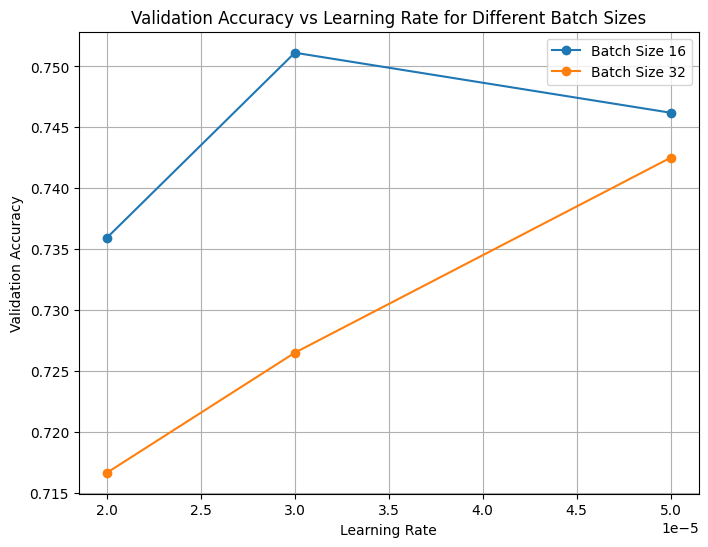

In [36]:
batch_sizes = results['batch_size'].unique()

plt.figure(figsize=(8, 6))
for bs in batch_sizes:
    # Select rows for the current batch size
    subset = results[results['batch_size'] == bs]
    # Sort by learning_rate for smooth line plot
    subset = subset.sort_values('learning_rate')
    plt.plot(subset['learning_rate'], subset['val_accuracy'], marker='o', label=f'Batch Size {bs}')

plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Learning Rate for Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/My Drive/BA THESIS/graphs/training/validation_accuracy_vs_learning_rate.png")
plt.show()

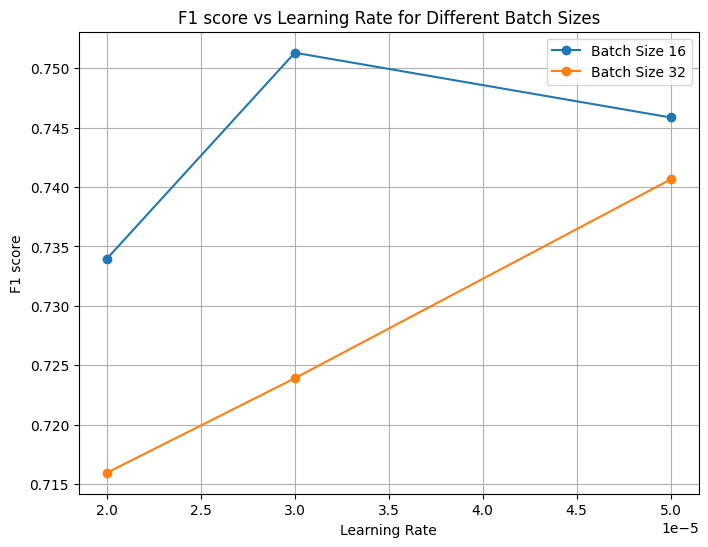

In [37]:
plt.figure(figsize=(8, 6))
for bs in batch_sizes:
    # Select rows for the current batch size
    subset = results[results['batch_size'] == bs]
    # Sort by learning_rate for smooth line plot
    subset = subset.sort_values('learning_rate')
    plt.plot(subset['learning_rate'], subset['val_f1'], marker='o', label=f'Batch Size {bs}')

plt.xlabel('Learning Rate')
plt.ylabel('F1 score')
plt.title('F1 score vs Learning Rate for Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/My Drive/BA THESIS/graphs/training/f1_vs_learning_rate.png')
plt.show()

We can see that overall smaller batch size yields better results, and the learning rate of 3e-5 yields the best results. These parameters we will keep fixed and train over multiple epochs.

Now, we fix the batch size at 16 and the learning rate at 3e-5 and optimize for the number of epochs. The search range is 1 to 5 epochs.

In [38]:

# Fixed hyperparameters
fixed_batch_size = 16
fixed_learning_rate = 3e-5
epoch_list = [1, 2, 3, 4, 5]



results = []

train_dataset = dataset_train.shuffle(buffer_size=len(train_BERT)).batch(fixed_batch_size)
val_dataset = dataset_val.batch(fixed_batch_size)

for num_epochs in epoch_list:
    print(f"Training for {num_epochs} epochs with batch size {fixed_batch_size} and learning rate {fixed_learning_rate}")

    #K.clear_session()
    #gc.collect()

    # Load and compile the model
    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=fixed_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs, verbose=1)

    # Evaluate the model on the validation dataset for accuracy
    eval_results = model.evaluate(val_dataset, verbose=0)
    val_accuracy = eval_results[1]

    # Compute F1 score manually
    all_preds = []
    all_labels = []
    for batch in val_dataset:
        inputs, labels = batch
        logits = model(inputs, training=False).logits
        preds = tf.argmax(logits, axis=-1).numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())
    val_f1 = f1_score(all_labels, all_preds, average='macro')

    # Save the metrics and hyperparameter info in the results list
    results.append({
        "epochs": num_epochs,
        "batch_size": fixed_batch_size,
        "learning_rate": fixed_learning_rate,
        "val_accuracy": val_accuracy,
        "val_f1": val_f1
    })

    print(f"Finished {num_epochs} epochs: Accuracy = {val_accuracy:.4f}, F1 = {val_f1:.4f}\n")

    # Clean up model from memory
    del model

# Print results
for res in results:
    print(res)


Training for 1 epochs with batch size 16 and learning rate 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1066/1066 [==============================] - 122s 78ms/step - loss: 0.7670 - accuracy: 0.6641 - val_loss: 0.6179 - val_accuracy: 0.7495
Finished 1 epochs: Accuracy = 0.7495, F1 = 0.7498

Training for 2 epochs with batch size 16 and learning rate 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
1066/1066 [==============================] - 123s 79ms/step - loss: 0.7654 - accuracy: 0.6625 - val_loss: 0.6242 - val_accuracy: 0.7536
Epoch 2/2
1066/1066 [==============================] - 69s 64ms/step - loss: 0.4704 - accuracy: 0.8212 - val_loss: 0.6236 - val_accuracy: 0.7577
Finished 2 epochs: Accuracy = 0.7577, F1 = 0.7569

Training for 3 epochs with batch size 16 and learning rate 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1066/1066 [==============================] - 123s 78ms/step - loss: 0.7704 - accuracy: 0.6648 - val_loss: 0.6202 - val_accuracy: 0.7368
Epoch 2/3
1066/1066 [==============================] - 69s 65ms/step - loss: 0.4863 - accuracy: 0.8136 - val_loss: 0.5723 - val_accuracy: 0.7749
Epoch 3/3
1066/1066 [==============================] - 68s 64ms/step - loss: 0.2769 - accuracy: 0.9034 - val_loss: 0.6488 - val_accuracy: 0.7655
Finished 3 epochs: Accuracy = 0.7655, F1 = 0.7653

Training for 4 epochs with batch size 16 and learning rate 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
1066/1066 [==============================] - 124s 79ms/step - loss: 0.7714 - accuracy: 0.6648 - val_loss: 0.6519 - val_accuracy: 0.7441
Epoch 2/4
1066/1066 [==============================] - 69s 65ms/step - loss: 0.4849 - accuracy: 0.8187 - val_loss: 0.5860 - val_accuracy: 0.7745
Epoch 3/4
1066/1066 [==============================] - 69s 64ms/step - loss: 0.2728 - accuracy: 0.9055 - val_loss: 0.6484 - val_accuracy: 0.7741
Epoch 4/4
1066/1066 [==============================] - 68s 63ms/step - loss: 0.1472 - accuracy: 0.9518 - val_loss: 0.8884 - val_accuracy: 0.7573
Finished 4 epochs: Accuracy = 0.7573, F1 = 0.7572

Training for 5 epochs with batch size 16 and learning rate 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1066/1066 [==============================] - 124s 81ms/step - loss: 0.7625 - accuracy: 0.6691 - val_loss: 0.6367 - val_accuracy: 0.7400
Epoch 2/5
1066/1066 [==============================] - 69s 64ms/step - loss: 0.4675 - accuracy: 0.8245 - val_loss: 0.5824 - val_accuracy: 0.7762
Epoch 3/5
1066/1066 [==============================] - 67s 63ms/step - loss: 0.2744 - accuracy: 0.9034 - val_loss: 0.7734 - val_accuracy: 0.7429
Epoch 4/5
1066/1066 [==============================] - 67s 63ms/step - loss: 0.1472 - accuracy: 0.9531 - val_loss: 0.8162 - val_accuracy: 0.7671
Epoch 5/5
1066/1066 [==============================] - 67s 63ms/step - loss: 0.1045 - accuracy: 0.9677 - val_loss: 0.8808 - val_accuracy: 0.7721
Finished 5 epochs: Accuracy = 0.7721, F1 = 0.7715

{'epochs': 1, 'batch_size': 16, 'learning_rate': 3e-05, 'val_accuracy': 0.7494866251945496, 'val_f1': 0.7497893821202898}
{'epochs': 2, 'batch_size': 16, 'learning_rate': 3e-05, 'val_accuracy': 0.7577002048492432, 'val_f1':

In [39]:
df = pd.DataFrame(results)
df.to_csv("/content/drive/My Drive/BA THESIS/epochs_results.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [40]:
# laod in training results

file_path_epochs = "/content/drive/My Drive/BA THESIS/epochs_results.csv"


# Load CSV
epochs = pd.read_csv(file_path_epochs)
epochs

,epochs,batch_size,learning_rate,val_accuracy,val_f1
0,1,16,0.00003,0.749487,0.749789
1,2,16,0.00003,0.757700,0.756876
2,3,16,0.00003,0.765503,0.765302
3,4,16,0.00003,0.757290,0.757194
4,5,16,0.00003,0.772074,0.771541


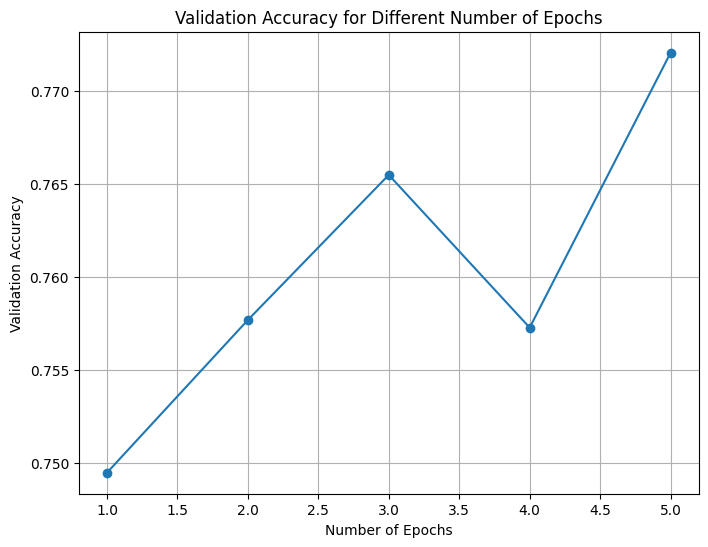

In [41]:
plt.figure(figsize=(8, 6))

plt.plot(epochs['epochs'], epochs['val_accuracy'], marker='o')

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Number of Epochs')
plt.grid(True)
plt.savefig('/content/drive/My Drive/BA THESIS/graphs/training/validation_accuracy_vs_epochs.png')
plt.show()

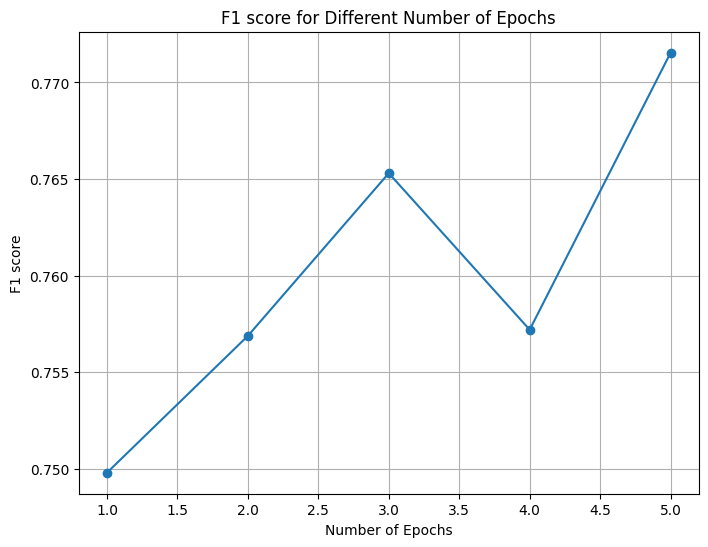

In [42]:
plt.figure(figsize=(8, 6))

plt.plot(epochs['epochs'], epochs['val_f1'], marker='o')

plt.xlabel('Number of Epochs')
plt.ylabel('F1 score')
plt.title('F1 score for Different Number of Epochs')
plt.grid(True)
plt.savefig('/content/drive/My Drive/BA THESIS/graphs/training/f1_vs_epochs.png')
plt.show()

From the graph we can see that the last significant improvement happens when we increase the number of epochs from 1 to 2. As the increase of epochs linearly increases complexity, it is only worth to do an additional epoch when it yields significant increae in accuracy or F1 score. From the graphs and the table we can decide to chose the model that ha sbeen trained for only 2 epochs.

### Train and save final model

Now we train and save the model with the final hyperparameters that are:
- batch size: 16
- learning rate: 3e-5
- epochs: 3

In [43]:
# Shuffle and batch the dataset
batch_size = 16
dataset_train = dataset_train.shuffle(buffer_size=len(train_BERT)).batch(batch_size)
dataset_val = dataset_val.batch(batch_size)

In [44]:
# Positive, negative, neutral classification, num_labels=3
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Compile the model with an optimizer, loss, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
num_epochs = 3
history = model.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=num_epochs
)

Epoch 1/3
1066/1066 [==============================] - 122s 78ms/step - loss: 0.7537 - accuracy: 0.6781 - val_loss: 0.6408 - val_accuracy: 0.7548
Epoch 2/3
1066/1066 [==============================] - 69s 65ms/step - loss: 0.4732 - accuracy: 0.8210 - val_loss: 0.5929 - val_accuracy: 0.7733
Epoch 3/3
1066/1066 [==============================] - 67s 63ms/step - loss: 0.2657 - accuracy: 0.9093 - val_loss: 0.7060 - val_accuracy: 0.7647


In [46]:
eval_results = model.evaluate(dataset_val)
print(f"Validation Loss: {eval_results[0]:.4f}, Validation Accuracy: {eval_results[1]:.4f}")


153/153 [==============================] - 5s 36ms/step - loss: 0.7060 - accuracy: 0.7647
Validation Loss: 0.7060, Validation Accuracy: 0.7647


In [48]:
# Save the model
model.save_pretrained("/content/drive/My Drive/BA THESIS/trained_bert_model/bert_model")

# Save the tokenizer (important for preprocessing when using the model later)
tokenizer.save_pretrained("/content/drive/My Drive/BA THESIS/trained_bert_model/bert_tokenizer")

('/content/drive/My Drive/BA THESIS/trained_bert_model/bert_tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/BA THESIS/trained_bert_model/bert_tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/BA THESIS/trained_bert_model/bert_tokenizer/vocab.txt',
 '/content/drive/My Drive/BA THESIS/trained_bert_model/bert_tokenizer/added_tokens.json')